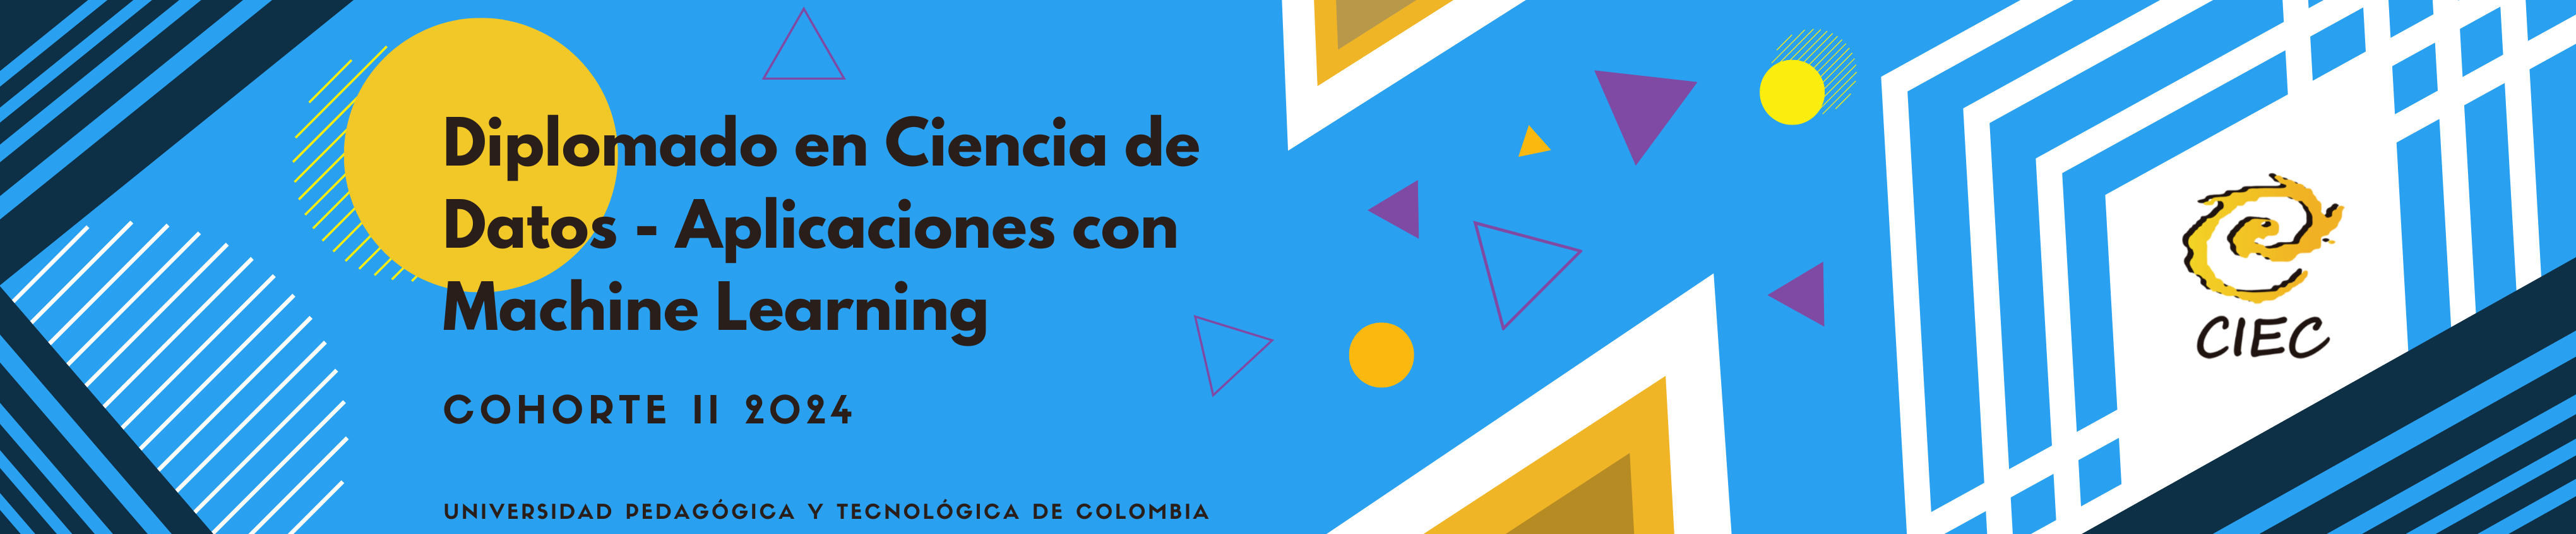

<!-- Main Title -->

**<h1 style="color: #FECB05; text-align: center;"> Regresión Polinomial </h1>**

---

**<h2 style="color: #007ACC;">Autores</h2>**

- [Andrés Felipe Flórez Olivera](https://www.linkedin.com/in/felipeflorezo/)

---

<!-- Table of Contents -->
**<h2 style="color: #007ACC;">Tabla de contenido</h2>**

- [<span style="color: #005C99;">Conceptos Fundamentales</span>](#section1)
  - [<span style="color: #003366;">1.1. Datos no Etiquetados</span>](#subsection11)
  - [<span style="color: #003366;">1.2. Medidas de Similaridad y Distancia</span>](#subsection12)
- [<span style="color: #005C99;">2. Agrupamiento (Clustering)</span>](#section2)
  - [<span style="color: #003366;">2.1. K-Means (K-Promedios)</span>](#subsection21)
    - [<span style="color: #003366;">2.1.1. Caso Aplicado: Cuantificación del color mediante K-Means </span>](#subsection211)
  - [<span style="color: #003366;">2.2. Agrupamiento Jerárquico</span>](#subsection22)
  - [<span style="color: #003366;">2.3. DBSCAN</span>](#subsection23)

---

**<h2 style="color: #007ACC;">Introducción</h2>**

La **regresión polinomial** es una extensión de la regresión lineal que permite modelar relaciones no lineales entre la variable dependiente y las independientes al incluir términos polinómicos de las variables. A pesar de su nombre, se basa en los mismos principios de la regresión lineal: ajusta un modelo mediante una combinación lineal de parámetros, pero aplicado a variables transformadas.

### Relación con la regresión lineal
La regresión polinomial no es más que un caso particular de la regresión lineal, donde se crean nuevas variables a partir de potencias de las originales. Por ejemplo, para un modelo cuadrático, se incluyen términos como \(x\) y \(x^2\). Así, aunque el modelo puede parecer no lineal en su forma, sigue siendo lineal en los coeficientes, lo que permite usar las mismas técnicas de optimización que en la regresión lineal.

### Ventajas y flexibilidad
1. **Mayor capacidad de ajuste**: La inclusión de términos polinómicos permite capturar patrones más complejos y no lineales en los datos, haciendo al modelo más flexible que la regresión lineal simple.
2. **Interpretación ampliada**: Puede revelar relaciones subyacentes que no son evidentes en un modelo lineal.

### Desventajas
1. **Propensión al sobreajuste**: Al aumentar el grado del polinomio, el modelo puede ajustarse demasiado a los datos de entrenamiento, capturando ruido en lugar de relaciones reales.
2. **Difícil de interpretar**: A medida que el grado del polinomio crece, los coeficientes pierden interpretabilidad.
3. **Complejidad computacional**: Modelos de alto grado pueden ser costosos computacionalmente y propensos a inestabilidades numéricas.

En resumen, la regresión polinomial es una herramienta poderosa para capturar relaciones no lineales, pero requiere un equilibrio cuidadoso entre flexibilidad y simplicidad para evitar problemas de sobreajuste y pérdida de interpretabilidad.

---

# <!-- Section 1 -->
**<h2 id="section1" style="color: #007ACC;">1. Regresión y la Función Verdadera Oculta</h2>**

Revisaremos los conceptos de regresión vistos en el teórico.

Haremos pruebas con datos de entrada de **una dimensión**.

In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
import numpy as np
np.set_printoptions(suppress=True)  # no usar notacion "e"

Usaremos como función oculta un sinusoide.

In [48]:
def create_sinusoidal_data(spread=0.25, data_size=50):
    np.random.seed(0)
    x = np.linspace(0, 1, data_size)
    y = np.sin(2 * np.pi * x) + np.random.normal(scale=spread, size=x.shape)

    return x, y

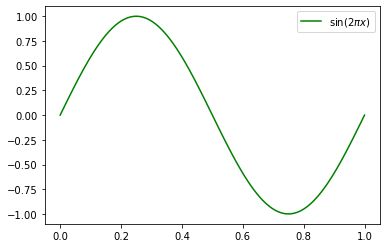

In [49]:
x, f_x = create_sinusoidal_data(0, 100)
plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

# <!-- Section 2 -->
**<h2 id="section2" style="color: #007ACC;">2. Muestras sintéticas</h2>**

Tomaremos puntos uniformes en $x$, ruidosos en $y$.

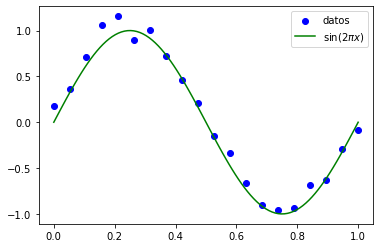

In [50]:
data_size = 20
X, y = create_sinusoidal_data(0.10, data_size)

plt.scatter(X, y, color="blue", label="datos")
plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

In [51]:
X

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [52]:
y

array([ 0.17640523,  0.36471519,  0.71208651,  1.0612558 ,  1.15615606,
        0.89885671,  1.01078217,  0.72058819,  0.46562551,  0.20565444,
       -0.15019023, -0.33052004, -0.65962014, -0.90360583, -0.95219817,
       -0.93603283, -0.68775857, -0.63472854, -0.2933927 , -0.08540957])

# <!-- Section 3 -->
**<h2 id="section3" style="color: #007ACC;">3. División en Entrenamiento y Evaluación</h2>**

Dividiremos aleatoriamente los datos en una parte para entrenamiento y otra para evaluación.

Usaremos 
[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de scikit-learn:

In [55]:
from sklearn.model_selection import train_test_split

train_size = 5
val_size = data_size - train_size
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=train_size, random_state=0)

In [56]:
X_train.shape, X_val.shape

((5,), (15,))

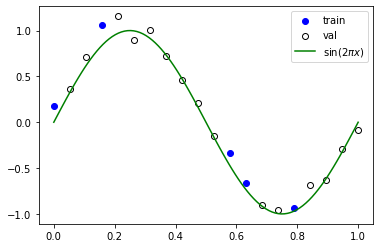

In [57]:
plt.scatter(X_train, y_train, color="blue", label="train")
plt.scatter(X_val, y_val, color="white", edgecolor="k", label="val")
plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

# <!-- Section 4 -->
**<h2 id="section4" style="color: #007ACC;">4. Primer acercamiento:Regresion Lineal</h2>**


Probaremos ajustar los puntos usando una recta.

Vamos a programar a mano el aprendizaje y la predicción.

### Solución de Cuadrados Mínimos

Datos de entrenamiento:
- $X \in R^{N \times K}:$ $N$ vectores de entrada, de $K$ dimensiones cada uno.
- $y \in R^N:$ $N$ valores de salida.

Aprendizaje:

$$w^* = (X^\top X)^{-1} X^\top y$$

Predicción:

$$f_{w^*}(x) = x^\top w^* = \sum_{k=1}^K x_k w^*_k$$

Con $K=1$ tendríamos:

$$f_{w^*}(x) = x_1 w_1^*$$

Para que sea una recta nos falta un $w_0$ ("bias").
Esto se puede resolver haciendo $K=2$ y agregando un valor constante 1 a cada dato:

$$f_{w^*}((1, x)) = w_0 + x_1 w_1^*$$


In [58]:
X_train

array([0.57894737, 0.15789474, 0.        , 0.78947368, 0.63157895])

In [59]:
X_train.shape

(5,)

In [60]:
X_train_bias = np.stack((np.ones(X_train.shape[0]), X_train), axis=1)  # add bias
X_train_bias

array([[1.        , 0.57894737],
       [1.        , 0.15789474],
       [1.        , 0.        ],
       [1.        , 0.78947368],
       [1.        , 0.63157895]])

In [61]:
X_train_bias.shape

(5, 2)

In [15]:
def linear_least_squares(X, y):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias
    return np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))

def f(X, w):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias: (1, x)
    return X_b.dot(w)

---
Entrenar

---

In [62]:
X_train, y_train

(array([0.57894737, 0.15789474, 0.        , 0.78947368, 0.63157895]),
 array([-0.33052004,  1.0612558 ,  0.17640523, -0.93603283, -0.65962014]))

In [63]:
w = linear_least_squares(X_train, y_train)

In [64]:
w  # qué dimensiones tiene w?

array([-1.95626346,  0.70657973])

---
Graficar

---

Graficaremos la función aprendida a partir de los datos de entrenamiento. También graficaremos con los datos de evaluación y la función oculta, para comparar.

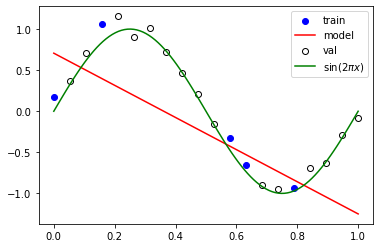

In [68]:
plt.scatter(X_train, y_train, color="blue", label="train")
plt.plot(x, f(x, w), color="red", label="model")
plt.scatter(X_val, y_val, color="white", edgecolor="k", label="val")
plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

---
Predecir y Evaluar: Error Cuadrático Medio

---

Obtendremos los valores predichos para los datos de entrenamiento y de evaluación.
Calcularemos el error cuadrático medio sobre ambos conjuntos de datos.

In [69]:
y_train_pred = f(X_train, w)
y_val_pred = f(X_val, w)

Usamos la función [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) de scikit-learn:

In [70]:
from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train, y_train_pred)
val_error = mean_squared_error(y_val, y_val_pred)
print(f'Train error: {train_error:f}')
print(f'Val error: {val_error:f}')

Train error: 0.151445
Val error: 0.381363


# <!-- Section 5 -->
**<h2 id="section5" style="color: #007ACC;">5. Regresión Polinomial</h2>**

Ahora haremos regresión polinomial. En este caso usaremos scikit-learn para definir el modelo, entrenar y predecir.

En scikit-learn cada dato de entrada debe ser un vector, no un número. Debemos convertir cada dato en un vector de una dimensión:

In [72]:
X_train.shape, X_val.shape

((5,), (15,))

In [73]:
X_train = X_train.reshape(-1, 1)
X_val = X_val.reshape(-1, 1)
X_train.shape, X_val.shape

((5, 1), (15, 1))

---
Features Polinomiales

---

En scikit-learn, la regresión polinomial se implementa como un modelo de dos pasos.

El primer paso genera vectores de características polinomiales, y el segundo paso aplica una regresión lineal sobre estos vectores (ver [Polynomial interpolation](https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html)).

Por ejemplo, para generar características polinomiales de grado 5:

In [75]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(5)  # polinomio de grado 5
pf.fit(X_train)             # no necesita y_train!

PolynomialFeatures(degree=5)

In [76]:
X_train.shape

(5, 1)

In [77]:
X_train2 = pf.transform(X_train)

In [78]:
X_train2.shape  # qué forma tiene esto?

(5, 6)

In [79]:
X_train[0]

array([0.57894737])

In [80]:
X_train2[0]

array([1.        , 0.57894737, 0.33518006, 0.19405161, 0.11234567,
       0.06504223])

---
Instanciar y Entrenar

---

Crearemos y entrenaremos un modelo de grado 2.

Como siempre en scikit-learn, para entrenar usamos la función **fit**.

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 2
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
model = make_pipeline(pf, lr)

In [85]:
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [32]:
# equivalente a:
Z_train = pf.fit_transform(X_train, y_train)
lr.fit(Z_train, y_train)

LinearRegression(fit_intercept=False)

---
Inspeccionar Parámetros

---

Ver [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [86]:
lr.coef_

array([ 0.45340784,  1.62753594, -4.67896686])

In [34]:
lr.intercept_

0.0

---
Graficar Resultado

---

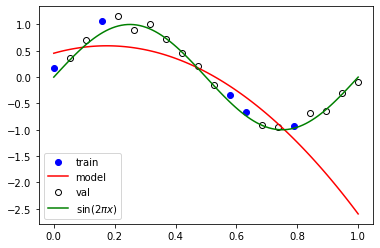

In [90]:
plt.scatter(X_train, y_train, color="blue", label="train")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.scatter(X_val, y_val, color="white", edgecolor="k", label="val")
plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

---
Predecir y Evaluar

---

Para predecir, usamos la función **predict**:

In [91]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

In [93]:
train_error = mean_squared_error(y_train, y_train_pred)
val_error = mean_squared_error(y_val, y_val_pred)
print(f'Train error: {train_error:0.2}')
print(f'Test error: {val_error:0.2}')

Train error: 0.091
Test error: 0.87


# <!-- Section 6 -->
**<h2 id="section6" style="color: #007ACC;">6. Sobreajuste vs. Generalización</h2>**

Probaremos polinomios de varios grados, obteniendo valores de error en entrenamiento y evaluación:

In [94]:
train_errors = []
val_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_val, y_val_pred)
    train_errors.append(train_error)
    val_errors.append(val_error)

In [39]:
train_errors, val_errors

([0.49661452325600575,
  0.1514454482029292,
  0.09082610739363783,
  0.0008955085900105529,
  1.3658387016803174e-29,
  3.033724848398774e-31,
  8.988700236444107e-30,
  8.535875587919781e-30,
  3.796701255167221e-29,
  3.4285142943509134e-28],
 [0.5391603515420854,
  0.3813628247100447,
  0.8685511508922741,
  0.01766716877562913,
  0.7619704304229191,
  0.9951653957824969,
  1.1957007653547593,
  1.334108608824598,
  1.392602026170999,
  1.3675834256939987])

Graficaremos las curvas de error en términos del grado del polinomio.

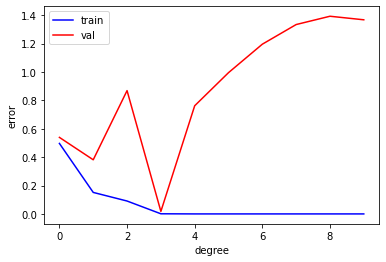

In [95]:
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, val_errors, color="red", label="val")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

Se puede ver que el error en entrenamiento siempre baja, pero que en algún punto comienza el sobreajuste, ya que el error en evaluación empieza a subir.

---
Mejor Modelo

---

De acuerdo a la gráfica anterior, y como era de esperarse, el modelo que mejor ajusta los datos es el de grado 3:

In [96]:
degree = 3
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train);

Graficamos:

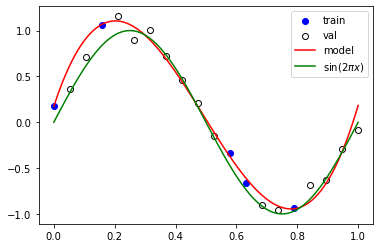

In [97]:
plt.scatter(X_train, y_train, color="blue", label="train")
plt.scatter(X_val, y_val, color="white", edgecolor="k", label="val")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

In [98]:
train_errors[3], val_errors[3]

(0.0008955085900105529, 0.01766716877562913)

---
Modelo Sobreajustado

---

Veamos cómo es la gráfica de uno de los modelos que sufre de sobreajuste:

In [99]:
degree = 8
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train);

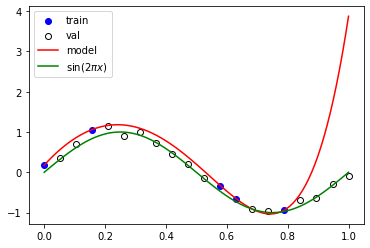

In [100]:
plt.scatter(X_train, y_train, color="blue", label="train")
plt.scatter(X_val, y_val, color="white", edgecolor="k", label="val")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

# <!-- Section 7 -->
**<h2 id="section7" style="color: #007ACC;">Ejercicios</h2>**
1. Probar agregando puntos a los datos de entrenamiento para prevenir el sobreajuste en polinomios de grado alto.
2. Imprimir los parámetros de los modelos para cada grado.
3. Probar usando regularización para prevenir el sobreajuste en polinomios de grado alto
(ver [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)).
4. Hicimos todo con datos de entrada de una dimensión. ¿Cómo serían los features polinomiales en datos de 2 o más dimensiones?

# <!-- Section 8 -->
**<h2 id="section8" style="color: #007ACC;">Referencias</h2>**

Scikit-learn:

- [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)
- [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
- [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)


**<h2 style="color: #007ACC;">Créditos</h2>**

---

**Docente:** Andrés Felipe Florez Olivera

**Universidad Pedagógica y Tecnológica de Colombia** - *Diplomado en Data Science: Aplicaciones con Machine Learning - Cohorte II - 2024*


---